In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb

import mejiro  # this loads mejiro's matplotlib style

In [2]:
h5_filepath = '/nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/06/roman_data_challenge_rung_1_v_0_1.h5'
f = h5py.File(h5_filepath, 'r')

In [119]:
images_group_length = len(f['images'])
print(f"Number of systems: {images_group_length}")

# Get all available UIDs
uids = [key.split('_')[-1] for key in f['images'].keys()]

# Filter UIDs with SNR > 100 in the F129 band
qualified_indices = []
for uid in uids:
    snr = f['images'][f'strong_lens_{uid}'][f'exposure_{uid}_F129'].attrs['snr'][0]
    if float(snr) > 100:
        qualified_indices.append(int(uid))

# Randomly select 18 indices
random_indices = np.random.choice(qualified_indices, size=18, replace=False)
print("Randomly selected indices:", random_indices)

Number of systems: 10274
Randomly selected indices: [ 9096    97  1122  7087 10295  7426 10085  3292  1209 10189  2058  9307
  7671  5498  5060  5061  8089  3735]


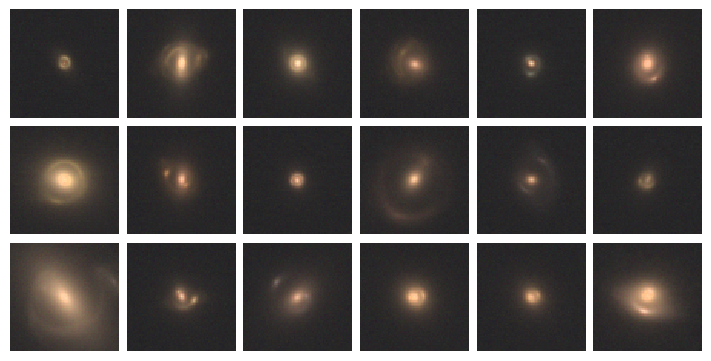

In [127]:
rgb_bands = ['F158', 'F129', 'F106']
crop = 10

fig, axes = plt.subplots(3, 6, figsize=(7, 3.5), constrained_layout=True)
axes = axes.flatten()

for ax, idx in zip(axes, random_indices):
    uid = f'{str(idx).zfill(8)}'

    exposures = []
    for band in rgb_bands:
        exposure = f['images'][f'strong_lens_{uid}'][f'exposure_{uid}_{band}'][:]
        exposure_time = f['images'][f'strong_lens_{uid}'][f'exposure_{uid}_{band}'].attrs['exposure_time'][0]
        exposure /= float(exposure_time)
        exposure = exposure[crop:-crop, crop:-crop]
        exposures.append(exposure)

    # create an RGB image
    rgb_image = make_lupton_rgb(image_r=exposures[0], image_g=exposures[1], image_b=exposures[2], stretch=3, Q=4)

    # f['images'][f'strong_lens_{uid}'].attrs['snr']

    ax.imshow(rgb_image)
    # ax.set_title(f'UID: {uid}')
    ax.axis('off')

plt.show()